In [222]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import re
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,  RepeatedStratifiedKFold, GridSearchCV
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer

In [223]:
import nltk
from nltk.corpus import stopwords

In [224]:
# list_stopwords = stopwords.words('russian')

In [225]:
def make_label(label):
    if label == 0:
        return 0
    elif label > 2:
        return 1
    
def tokenize_ru(sentence):
    sentence = re.sub(r'\[.+\|.+\],\s', '', str(sentence))
    sentence = sentence.replace('\n', ' ').replace('/', ' ')
    sentence = re.sub(r'[\'"”\,\!\?\.\-\(\)\[\]\:\;\»\«\>\—]', ' ', str(sentence).rstrip("']"))
    sentence = re.sub(r'[0-9]', '', str(sentence))
    sentence = sentence.lower()
    tokens = sentence.split()
#     tokens = [i for i in tokens if (i not in stop_words)]
    tokens = [morph.parse(i)[0].normal_form for i in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [226]:
def create_text_context(df_row):
    df_cont_text = []
#     print(df_row.shape)
    for i, row in df_row.iterrows():
        cont_text = str(row['контекст']) + '. ' +  str(row['текст']) 
        cont_text = tokenize_ru(cont_text)
        df_cont_text.append(cont_text)
#     df_row['текст_контекст'] = cont_text
    return df_cont_text

# data = data.dropna()[['контекст', 'текст', 'label']]
# list_text_cont = create_text_context(data[['контекст', 'текст']])

# обработка текста

In [227]:
data = pd.read_excel('data_class.xlsx')
data = shuffle(data) #перемешиваем данные

In [228]:
data = data.dropna()[['контекст', 'текст', 'label']]
# print(data[data['label'] == 0].shape[0], data[data['label'] == 1].shape[0], data[data['label'] == 2].shape[0], data[data['label'] == 3].shape[0])

# токенизация 
list_text_cont = create_text_context(data[['контекст', 'текст']])
data['text_cont'] = list_text_cont
list_train_label = data['label'].apply(make_label).tolist()
data['label_num'] = list_train_label
data = data.dropna()

# data['текст_леммат'] = data['текст'].apply(tokenize_ru)
print(data.shape)

data_train = data[:1000]
data_test = data[1000:]

# перевожу лейблы в промежуток [0, 1]
# list_train_label = data_train['label'].apply(make_label).tolist()
# list_test_label =  data_test['label'].apply(make_label).tolist()
# list_all_label = list_train_label + list_test_label


# data_all = pd.concat([data_train, data_test])
# data_all['label_num'] = list_all_label
# data_all = data_all.dropna()
# data_all.loc[2547, 'текст']
data

(1702, 5)


,контекст,текст,label,text_cont,label_num
2390,"да вы хоть все сдохните, а обнулиться надо","[id461498232|Андрей], +",0,да вы хоть весь сдохнуть а обнулиться надо +,0.0
336,"[id161201697|Александр], а если бы пропуска не...","[id139627374|Alesia], ну так люди всем недовол...",0,ну так человек весь недовольный всегда я уже п...,0.0
1251,"Если ему скажут,что он в белой рубашке ,а сам ...","[id473451806|Аскар], это тупо же",3,если он сказать что он в бела рубашка а сам чё...,1.0
1655,...и кто его выключает,"[id34276500|Екатерина], размыкается электричес...",0,и кто он выключать размыкаться электрический цепь,0.0
609,"а все кто называет свою страну рашка, не уважа...","[id23808109|Константин], сколько гнили от вас",3,а весь кто называть свой страна рашка не уважа...,1.0
...,...,...,...,...,...
923,Блять ты основу скинь свою репортик нахуй закину,"[id285196935|Алексей], ебать, расист собрался ...",3,блять ты основа скинуть свой репортик нахуй за...,1.0
2903,"[id41846458|Александр], они хоть без ошибок пи...","[id461729860|Алексей], ну, я скажу так, что па...",3,ну я сказать так что палка в говно тыкать и об...,1.0
1845,"[id407630175|Сергей], шпалы то как гнут ?","[id341223747|Кирилл], как гнут? Руками...",0,как гнутый рука,0.0
1548,1,"[id507822717|Игорь], ты первый только в списк...",3,ты один только в список даун,1.0


# векторизаторы

In [229]:
count_vect = CountVectorizer()
vect_tf = TfidfVectorizer()

# X_train_test_counts = count_vect.fit_transform(data_all['text_cont'])
X_train_test_counts = vect_tf.fit_transform(data['text_cont'])

In [230]:
X_train_test_counts.shape
# (2972, 5977)

(1702, 4556)

In [231]:
# X_train_counts = X_train_test_counts[:2000] #векторизованная тренировочная выборка
# x_test = X_train_test_counts [2000:] #векторизованная тестовая выборка

In [232]:
x_train = X_train_test_counts[:1000]
x_test = X_train_test_counts [1000:]
y_train = data_train['label_num']
y_test = data_test['label_num']

# байесовский классификатор

In [233]:
clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)

In [234]:
print(predicted.sum(), len(y_test), len(y_test)-predicted.sum())
log_probs = clf.predict_proba(x_test)
log_probs = log_probs[:, 1]

155.0 702 547.0


In [235]:
data_test[data_test['label'] == 1]
data.shape, data_test.shape

((1702, 5), (702, 5))

# 15 самых кооперативных и самых агрессивные комментов. наивный байес

In [236]:
for i in log_probs.argsort()[-15:][::-1]: # 15 most negative
#     count_idx = 1000 + i
#     print(data_test.shape)
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

print('\n\n', 'позитивные', '\n')
for i in log_probs.argsort()[:15]: # 15 most positive
#     count_idx = 1000 + i
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

3 Иди прославляй свою задницу в другом месте) 🤣🤣🤣
3 а я понял ты из тех кто любит говорит то о чём у самого болит? ну извеняй я не из таких как ты я нормальный гетеро, а мне твои гомо штучки не к чему))😂😂🤣
3 а я понял ты из тех кто любит говорит то о чём у самого болит? ну извеняй я не из таких как ты я нормальный гетеро, а мне твои гомо штучки не к чему))😂😂🤣
3 [id23808109|Константин], нахуй никому не сдался! Лучше б вместо показухи реально помогали ветеранам!
3 [id438610839|Беспечный], пиздец ты тупой
3 Долбаёб ты знаешь вообще что такое нацизм тупой даун тебе лет 12 с таким мозгом
3 [id23808109|Константин], сколько гнили от вас
3 [id563373962|Алексей], ебать ты тупой, с такой логикой тебе в наса главным инженером нахуй.
3 это ты в парашке и в головке у тебя парашка, а парад всем нужен
3 [id514692639|Стас], брысь
3 [id248747466|Амир], каждый твой комент - не понял.
Ты чё, Валакас? 
Или просто глупый?
3 [id172258851|Олег], тебя твоя мамка не научила чем отличается "о" от "из"? 
Твой сл

In [237]:
acc = accuracy_score(y_test, predicted)
micro_f1 = f1_score(y_test, predicted, average = 'micro')
micro_p = precision_score(y_test, predicted, average = 'micro')
micro_r = recall_score(y_test, predicted, average = 'micro')
macro_f1 = f1_score(y_test, predicted, average = 'macro')
macro_p = precision_score(y_test, predicted, average = 'macro')
macro_r = recall_score(y_test, predicted, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8020
micro F1=0.8020, micro P=0.8020, micro R=0.8020
macro F1=0.7623, macro P=0.8336, macro R=0.7462



In [238]:
# acc=0.7377
# micro F1=0.7377, micro P=0.7377, micro R=0.7377
# macro F1=0.7102, macro P=0.7113, macro R=0.7093

In [239]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

# метрики наивный байес

(702,) (702,)


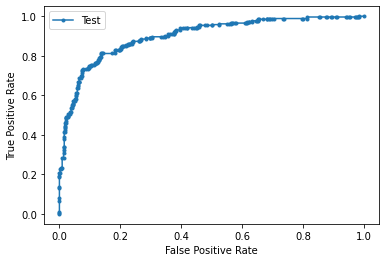

In [240]:
y_true = np.array(y_test.astype(int))

# predicted1 = pd.DataFrame(predicted, columns = ['target']).astype(int)
y_predicted = np.array(log_probs) #predicted1['target'])
print(y_predicted.shape, y_test.shape)
fpr, tpr, thrhld = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [241]:
print(roc_auc_score(y_true, y_predicted))

0.9003045596937


In [242]:
# X_train = X_train_counts
# y_train = data_train['label']
# y_test = data_test['label']

# как хорошо мы предсказываем, если наше предсказание случайно? 

In [243]:
model = linear_model.LogisticRegression()
model = model.fit(x_train, y_train)

In [244]:
import numpy as np
from sklearn.metrics import mean_squared_error

random_prediction = np.random.rand(len(y_test))
mean_squared_error(y_test, random_prediction)

0.34603743722846597

# логистическая регрессия

In [245]:
# train_preds = model.predict(X_train)
test_preds = model.predict(x_test)

log_probs = clf.predict_proba(x_test)
log_probs = log_probs[:, 1]

print('result on test: {}'.format(f1_score(y_test, test_preds, average='micro')))

result on test: 0.7991452991452992


# 15 самых кооперативных и самых агрессивные комментов для логистической регрессии

In [246]:
print('\n\n', 'негативные', '\n\n')
for i in log_probs.argsort()[-15:][::-1]: # 15 most negative
#     count_idx = 1000 + i
#     print(data_test.shape)
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

print('\n\n', 'позитивные', '\n')
for i in log_probs.argsort()[:15]: # 15 most positive
#     count_idx = 1000 + i
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')



 негативные 


3 Иди прославляй свою задницу в другом месте) 🤣🤣🤣
3 а я понял ты из тех кто любит говорит то о чём у самого болит? ну извеняй я не из таких как ты я нормальный гетеро, а мне твои гомо штучки не к чему))😂😂🤣
3 а я понял ты из тех кто любит говорит то о чём у самого болит? ну извеняй я не из таких как ты я нормальный гетеро, а мне твои гомо штучки не к чему))😂😂🤣
3 [id23808109|Константин], нахуй никому не сдался! Лучше б вместо показухи реально помогали ветеранам!
3 [id438610839|Беспечный], пиздец ты тупой
3 Долбаёб ты знаешь вообще что такое нацизм тупой даун тебе лет 12 с таким мозгом
3 [id23808109|Константин], сколько гнили от вас
3 [id563373962|Алексей], ебать ты тупой, с такой логикой тебе в наса главным инженером нахуй.
3 это ты в парашке и в головке у тебя парашка, а парад всем нужен
3 [id514692639|Стас], брысь
3 [id248747466|Амир], каждый твой комент - не понял.
Ты чё, Валакас? 
Или просто глупый?
3 [id172258851|Олег], тебя твоя мамка не научила чем отличается "о" 

# метрики логистический регрессии

In [247]:
acc = accuracy_score(y_test, test_preds)
micro_f1 = f1_score(y_test, test_preds, average = 'micro')
micro_p = precision_score(y_test, test_preds, average = 'micro')
micro_r = recall_score(y_test, test_preds, average = 'micro')
macro_f1 = f1_score(y_test, test_preds, average = 'macro')
macro_p = precision_score(y_test, test_preds, average = 'macro')
macro_r = recall_score(y_test, test_preds, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7991
micro F1=0.7991, micro P=0.7991, micro R=0.7991
macro F1=0.7627, macro P=0.8188, macro R=0.7479



In [248]:
print(roc_auc_score(y_true, test_preds))

0.7478506787330316


# тут уже можно не смотреть, я не уверена в результатах

In [249]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
stratified_folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)
repeated_folds = RepeatedStratifiedKFold(n_splits=n_fold, n_repeats=20, random_state=0)

In [250]:
for train_index, valid_index in stratified_folds.split(x_train, y_train):
#     print(train_index, valid_index)
    print("TRAIN:", len(train_index), "TEST:", len(valid_index))
    to_validate = y_train.iloc[valid_index]
    cls, counts = np.unique(to_validate, return_counts=True)
    print('value_counts {}\n'.format([(cl, value) for cl, value in zip(cls, counts)]))

TRAIN: 800 TEST: 200
value_counts [(0.0, 121), (1.0, 79)]

TRAIN: 800 TEST: 200
value_counts [(0.0, 121), (1.0, 79)]

TRAIN: 800 TEST: 200
value_counts [(0.0, 120), (1.0, 80)]

TRAIN: 800 TEST: 200
value_counts [(0.0, 120), (1.0, 80)]

TRAIN: 800 TEST: 200
value_counts [(0.0, 120), (1.0, 80)]



In [251]:
class_number = 2

In [252]:
def cv_train_model(X, y, X_test, y_test, folds=folds, model=None):
    prediction = np.zeros((len(y_test), class_number))
    valid_scores = []
    #feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        model.fit(X_train, y_train)      
        y_pred_test_proba = model.predict_proba(X_test)
        y_pred_valid = model.predict(X_valid)
        #ipdb.set_trace()
        valid_score = f1_score(y_valid, y_pred_valid, average='micro')
        
        valid_scores.append(valid_score)
        prediction += y_pred_test_proba 
        
    prediction /= (fold_n + 1)
    prediction = np.argmax(prediction, axis=1)
    test_score_proba_sum = f1_score(y_test, prediction, average='micro')
    print('Cross Validation mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(valid_scores), np.std(valid_scores)))
    print("score on test data: {0:.4f}".format(test_score_proba_sum)) 

    return prediction, valid_scores

# логистическая регрессия с использованием кросс валидации

In [253]:
model = linear_model.LogisticRegression()
prediction_lr, scores = cv_train_model(x_train, y_train, x_test, y_test,  model=model,  folds=folds)

Cross Validation mean score: 0.7650, std: 0.0283.
score on test data: 0.7821


In [254]:
model = linear_model.LogisticRegression()
prediction_lr_stratified, scores = cv_train_model(x_train, y_train, x_test, y_test, model=model,  folds=stratified_folds)

Cross Validation mean score: 0.7570, std: 0.0186.
score on test data: 0.7806


In [255]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [256]:
eli5.show_weights(model, top=50)

Weight?,Feature
+3.438,x4041
+1.851,x3929
+1.400,x4422
+1.372,x4033
+1.272,x4409
+1.210,x3233
+1.180,x669
+1.157,x3360
+1.148,x318
+1.057,x3507


In [257]:
eli5_weights = eli5.formatters.as_dataframe.explain_weights_df(model)

In [258]:
eli5_weights[eli5_weights.target==1]

,target,feature,weight
0,1.0,x4041,3.438498
1,1.0,x3929,1.850990
2,1.0,x4422,1.399535
3,1.0,x4033,1.372167
4,1.0,x4409,1.272485
...,...,...,...
3225,1.0,x1339,-0.716534
3226,1.0,x474,-0.737585
3227,1.0,x2389,-0.806872
3228,1.0,x2242,-0.866061


In [259]:
top_features = []
for i in range(class_number):
    class_features = [int(i[1:]) for i in eli5_weights[eli5_weights.target==i].feature if 'BIAS' not in i]
    len(class_features)
    top_features += class_features[:1000]

In [260]:
len(set(top_features))
top_features = list(set(top_features))

In [266]:
X_train_eli5 = x_train[:,top_features]
X_test_eli5 = x_test[:,top_features]

In [267]:
X_train_eli5.shape

(1000, 1000)

In [268]:
eli5_model = linear_model.LogisticRegression()
prediction_lr, _ = cv_train_model(X_train_eli5, y_train, X_test_eli5, y_test, model=eli5_model, folds = folds)

Cross Validation mean score: 0.7310, std: 0.0369.
score on test data: 0.7479


In [269]:
%%time

lr = linear_model.LogisticRegression()

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'solver' : ['liblinear', 'saga'],
                  'C' : [0.001, 0.01, 0.1, 1.0],
                  'max_iter': [2,10,50]
                 }

grid_search = GridSearchCV(lr, param_grid=parameter_grid, cv=folds, n_jobs=-1, scoring='f1_micro')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8200000000000001
Best parameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Wall time: 4.13 s


In [270]:
model = linear_model.LogisticRegression(**grid_search.best_params_)
prediction_lr, scores = cv_train_model(x_train, y_train, x_test, y_test,  model=model, folds = stratified_folds)

Cross Validation mean score: 0.8270, std: 0.0216.
score on test data: 0.8490


In [271]:
# lr_probs.argsort()/

In [272]:
data_test['текст']

2271    [id315765222|Astalavista], Astalavista, много ...
2097                  [id131549091|Лена], Голубая Устрица
578     [id413989660|Денис], согласен, собачка главное...
2984              [id6257679|Сержи], ну вот это логичнее.
1403    [id560090267|Александр], страна перестала бы с...
                              ...                        
923     [id285196935|Алексей], ебать, расист собрался ...
2903    [id461729860|Алексей], ну, я скажу так, что па...
1845            [id341223747|Кирилл], как гнут? Руками...
1548    [id507822717|Игорь],  ты первый только в списк...
1245    [id411336886|Даниил], \nОни могут взглядом лом...
Name: текст, Length: 702, dtype: object

In [273]:
print('\n\n', 'негативные', '\n\n')
for i in log_probs.argsort()[-15:][::-1]: # 15 most negative
#     count_idx = 1000 + i
#     print(data_test.shape)
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

print('\n\n', 'позитивные', '\n')
for i in log_probs.argsort()[:15]: # 15 most positive
#     count_idx = 1000 + i
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

Чую кремлебота с горящим пуканом🤣


я в курсе всё это фантазии моего больного воображения спорить не стану)




KeyError: 2654

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])
text_clf

In [ ]:
text_clf.fit(data_train['текст_леммат'], data_train['label']) 
predicted = text_clf.predict(data_test['текст_леммат'])

In [ ]:
acc = accuracy_score(data_test['label'], predicted)
micro_f1 = f1_score(data_test['label'], predicted, average = 'micro')
micro_p = precision_score(data_test['label'], predicted, average = 'micro')
micro_r = recall_score(data_test['label'], predicted, average = 'micro')
macro_f1 = f1_score(data_test['label'], predicted, average = 'macro')
macro_p = precision_score(data_test['label'], predicted, average = 'macro')
macro_r = recall_score(data_test['label'], predicted, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

In [ ]:
log_probs = text_clf.predict_proba(data_test['текст_леммат'])
log_probs = log_probs[:, 1]

In [ ]:
for i in log_probs.argsort()[-15:][::-1]: # 15 most negative
#     count_idx = 1000 + i
#     print(data_test.shape)
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')

print('\n\n', 'позитивные', '\n')
for i in log_probs.argsort()[:15]: # 15 most positive
#     count_idx = 1000 + i
    print(data_test.iloc[i]['label'], data_test.iloc[i]['текст'])
#     print('\n')